<a href="https://colab.research.google.com/github/prince545/ml-learning/blob/main/Bagging_%26Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import plot_tree


In [2]:
# Create classification data
X, y = make_classification(
    n_samples=200,          # number of samples
    n_features=5,           # total features
    n_informative=5,        # all features are informative
    n_redundant=0,          # no redundant features
    n_clusters_per_class=1, # each class has one cluster
    random_state=42
)

# Convert to DataFrame for easier understanding
df = pd.DataFrame(X, columns=[f"col{i}" for i in range(1, 6)])
df['target'] = y

# Check the shape
print(df.shape)  # (200, 6)
df.head()


(200, 6)


,col1,col2,col3,col4,col5,target
0,-0.168077,-0.251282,-0.356917,1.567999,1.211360,0
1,2.514391,1.288403,0.516355,-0.900873,-0.255031,1
2,-1.660959,0.563958,0.597236,1.106408,0.435303,0
3,1.009066,-1.783777,-2.188972,0.364013,0.219234,0
4,-2.575789,1.191408,-1.061052,1.230280,-1.060345,0


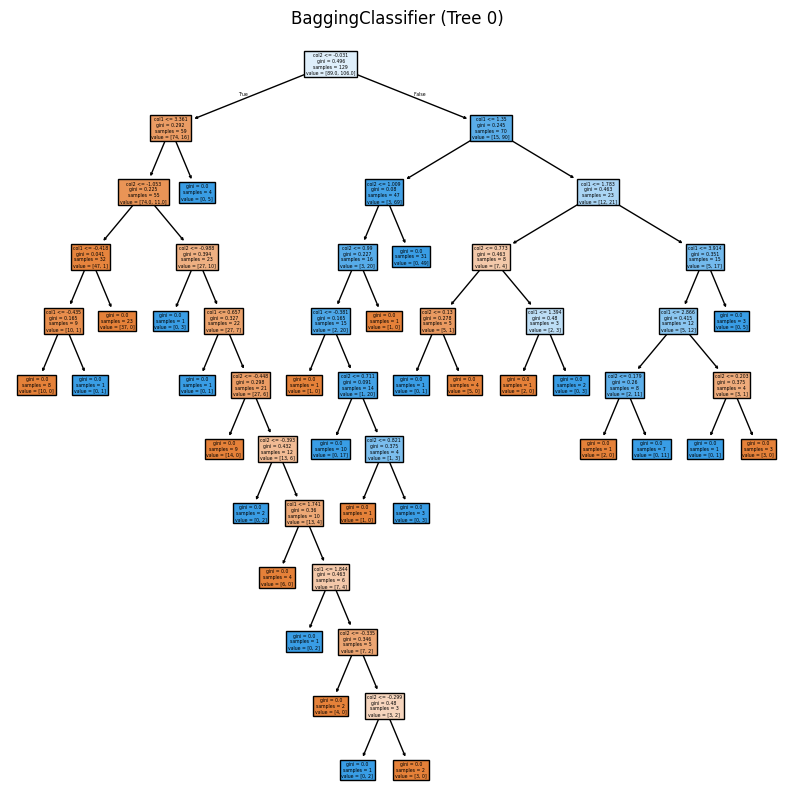

In [3]:
# BaggingClassifier with max_features=2
bag = BaggingClassifier(max_features=2, random_state=42)
bag.fit(df.iloc[:-5, :-1], df.iloc[:-5, -1])  # Skipping last 5 rows as pseudo test

# Plot the first decision tree from the ensemble
plt.figure(figsize=(10, 10))
plot_tree(bag.estimators_[0], feature_names=df.columns[:-1], filled=True)
plt.title("BaggingClassifier (Tree 0)")
plt.show()


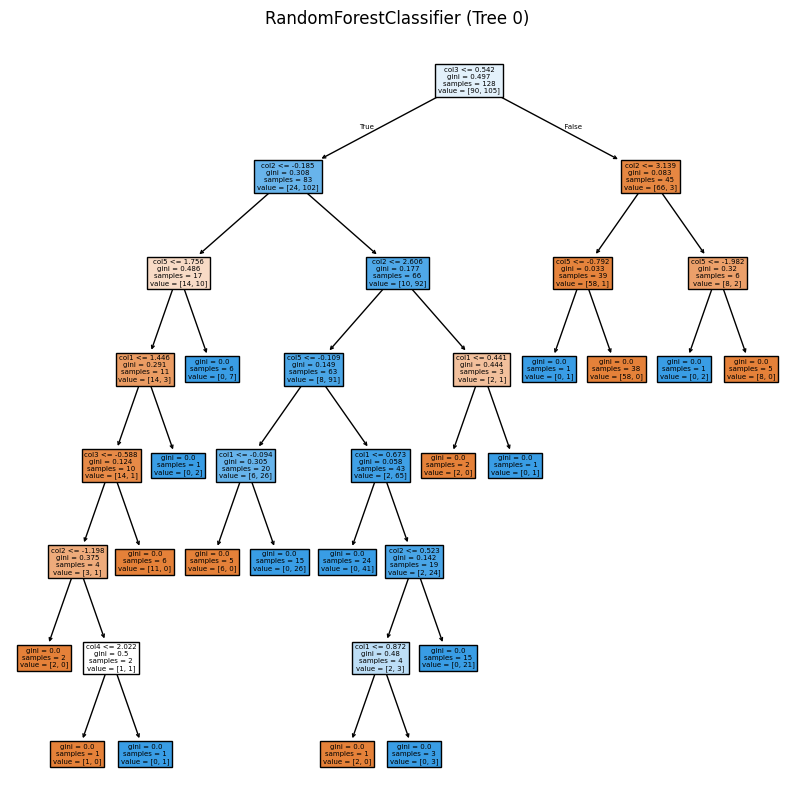

In [4]:
# RandomForestClassifier with max_features=2
rf = RandomForestClassifier(max_features=2, random_state=42)
rf.fit(df.iloc[:-5, :-1], df.iloc[:-5, -1])

# Plot the first decision tree
plt.figure(figsize=(10, 10))
plot_tree(rf.estimators_[0], feature_names=df.columns[:-1], filled=True)
plt.title("RandomForestClassifier (Tree 0)")
plt.show()
